# Credit Card Fraud Detection using Scikit Learn and Tensorflow
*Fitzroy Petgrave*

* Executive Summary
* Introduction
* Exploring the dataset
* Data Preprocessing
* Train and evaluate classification models: 
    1. Logistic Regression
    2. XGBoost Classifier
    3. Artificial Neural Networks
* Conclusion
* References 


## INTRODUCTION

### The Problem

In this notebook we will create a model that can detect credit card fraud with the best accuracy which can be easily deployed into production for both web and mobile tech stack.

To make a prediction, the model will read input details of a customer's transaction, and go on to classify the transaction as fraudulent or not, making it a Binary Classification problem

### About Scikit Learn and Tensorflow

To get the best model performance, historical customer transaction data is trained, tested and evaluated using modules and classification models in Scikit learn and Tensorflow libraries.

Scikit-learn is a free software machine learning library for the Python programming language that features various classification, regression and clustering algorithms.

TensorFlow is also a free and open-source software library, but used for both machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

* Logistic regression in Scikit learn
* Decision trees
* Artificial neural networks in Tensorflow

## DATA EXPLORATION

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# create dataframe with dataset
df = pd.read_csv('../input/creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The customer dataset has 31 columns and 284,807 number of rows. 

### Null Values and Data Types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

No null values or missing values and all variables are numerical so no preprocessing for empty values and strings. 

### Central Tendencies of the Dataset Variables

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### How many are fraud and how many are not fraud ?

In [4]:
class_names = {0:'Not Fraud', 1:'Fraud'}

# count the distinct values and rename the index
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


### Define features and target variables

In [5]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [6]:
data_features = df[feature_names]
data_target = df[target]

### Split Data into training and test sets

In [7]:
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size=0.80, 
                                                    test_size=0.20, 
                                                    random_state=0
                                                   )

### Data Normalization: Feature Scaling

From the description of the dataset, we might experience some bias when training the data because of how much larger 'Amount' is relative to other variables. The model might wrongly learn that the 'Amount' column has more effect on the probability of a transaction being fraudulent. 

To solve this problem we normalize the data by representing all variables on same scale using Standard Scalar() module.

In [9]:
from sklearn.preprocessing import StandardScaler  # To normalize the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
data_features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


## Binary Classification model using Scikit-Learn

In [11]:
# Importing relevant libraries 

from sklearn.linear_model import LogisticRegression  # Binary Model
from sklearn.pipeline import Pipeline  # Pipelines for cleaner code
from sklearn.metrics import accuracy_score  # To evaluate the model using accuracy
from sklearn.metrics import confusion_matrix  # To evaluate model performance on training and test sets
from sklearn.model_selection import cross_validate

### Train and Fit Linear Regression Model

In [12]:
# Define and fit the logistic regression model
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(X_train, y_train)

# Make predictions
pred_lr = model_lr.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Make Predictions and Evaluate Model

In [13]:
# Evaluate model
matrix = confusion_matrix(y_test, pred_lr)
print(matrix)
accuracy_score(y_test, pred_lr)

[[56852     9]
 [   37    64]]


0.9991924440855307

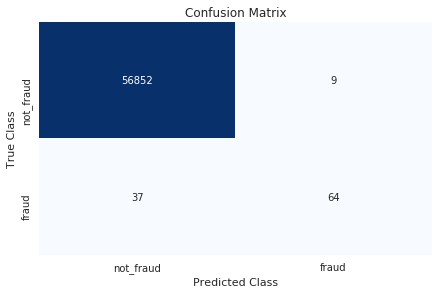

In [14]:
# Create pandas dataframe
class_names = ['not_fraud', 'fraud']
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

### Evaluate Linear Regression Model

In [15]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred_lr), 2)
recall_score = round(recall_score(y_test, pred_lr), 2)
print("Sensitivity/Recall for Logistic Regression Model : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model : 0.63
F1 Score for Logistic Regression Model : 0.74


### Discussion

In the earlier model created by RENJITH MADHAVAN where this notebook was copied from, the dataset features were visualised using subplots, and split into training and validation samples and using to train a Logistic Regression Model which resulted in the performance below

**Sensitivity/Recall for Logistic Regression Model 1 : 0.58
F1 Score for Logistic Regression Model 1 : 0.68**


However, with the addition of the standard scalar, the model accuracy has been improved as shown below

**Sensitivity/Recall for Logistic Regression Model 1 : 0.63
F1 Score for Logistic Regression Model 1 : 0.74**


## Deep Learning Binary Classification with Keras

This is a binary classification problem where we want to predict whether a transaction is fraudulent or not. For improve on model performance this project cover the trainning of Artificial Nueral Networks. 

In the Deep learning framwork, we use Keras - a minimalist Python library for deep learning that can run on top of TensorFlow.

It was developed to make implementing deep learning models as fast and easy as possible for research and development.

The main type of model used in keras is called a Sequence which is a linear stack of layers.

You create a sequence and add layers to it in the order that you wish for the computation to be performed.

Once defined, you compile the model which makes use of the underlying framework to optimize the computation to be performed by your model. In this you can specify the loss function and the optimizer to be used.

Once compiled, the model must be fit to data.

Once trained, you can use your model to make predictions on new data.

We can summarize the construction of deep learning models in Keras as follows:

* Define your model. Create a sequence and add layers.

* Compile your model. Specify loss functions and optimizers.

* Fit your model. Execute the model using data.

* Make predictions. Use the model to generate predictions on new data.

# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>

### Importing Relevant Libraries

In [16]:
# Set up deep learning library
from tensorflow import keras
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

input_shape = [X_train.shape[1]]

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
# define model
model_s = Sequential()
model_s.add(BatchNormalization(input_shape=input_shape))
model_s.add(Dense(256, activation='relu'))
model_s.add(BatchNormalization())
model_s.add(Dropout(0.3))
model_s.add(Dense(256, activation='relu'))
model_s.add(BatchNormalization())
model_s.add(Dropout(0.3))
model_s.add(Dense(1, activation='sigmoid'))

### Add Optimizer, Loss and Metric

In [18]:
model_s.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [19]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    min_delta=0.001,
    verbose=2,
)

In [20]:
history = model_s.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=1000,
    epochs=100,
    callbacks=[early_stopping],
)

Train on 227845 samples, validate on 56962 samples
Epoch 1/100
227845/227845 [==============================] - 9s 38us/step - loss: 0.2262 - binary_accuracy: 0.9272 - val_loss: 0.0196 - val_binary_accuracy: 0.9994
Epoch 2/100
227845/227845 [==============================] - 8s 34us/step - loss: 0.0160 - binary_accuracy: 0.9990 - val_loss: 0.0097 - val_binary_accuracy: 0.9994
Epoch 3/100
227845/227845 [==============================] - 8s 35us/step - loss: 0.0108 - binary_accuracy: 0.9991 - val_loss: 0.0086 - val_binary_accuracy: 0.9994
Epoch 4/100
227845/227845 [==============================] - 8s 33us/step - loss: 0.0081 - binary_accuracy: 0.9992 - val_loss: 0.0058 - val_binary_accuracy: 0.9994
Epoch 5/100
227845/227845 [==============================] - 8s 34us/step - loss: 0.0075 - binary_accuracy: 0.9993 - val_loss: 0.0070 - val_binary_accuracy: 0.9994
Epoch 6/100
227845/227845 [==============================] - 8s 34us/step - loss: 0.0076 - binary_accuracy: 0.9992 - val_loss: 0.

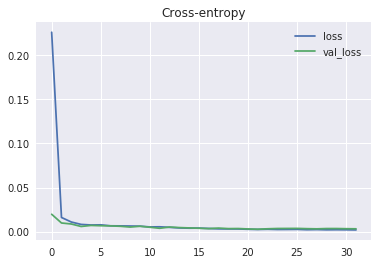

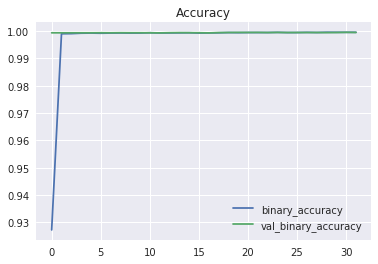

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")